# Baigiamojo darbo tema: 
# 25 proc. ekologiškai dirbamų plotų ES iki 2030 m. – misija (ne)įmanoma








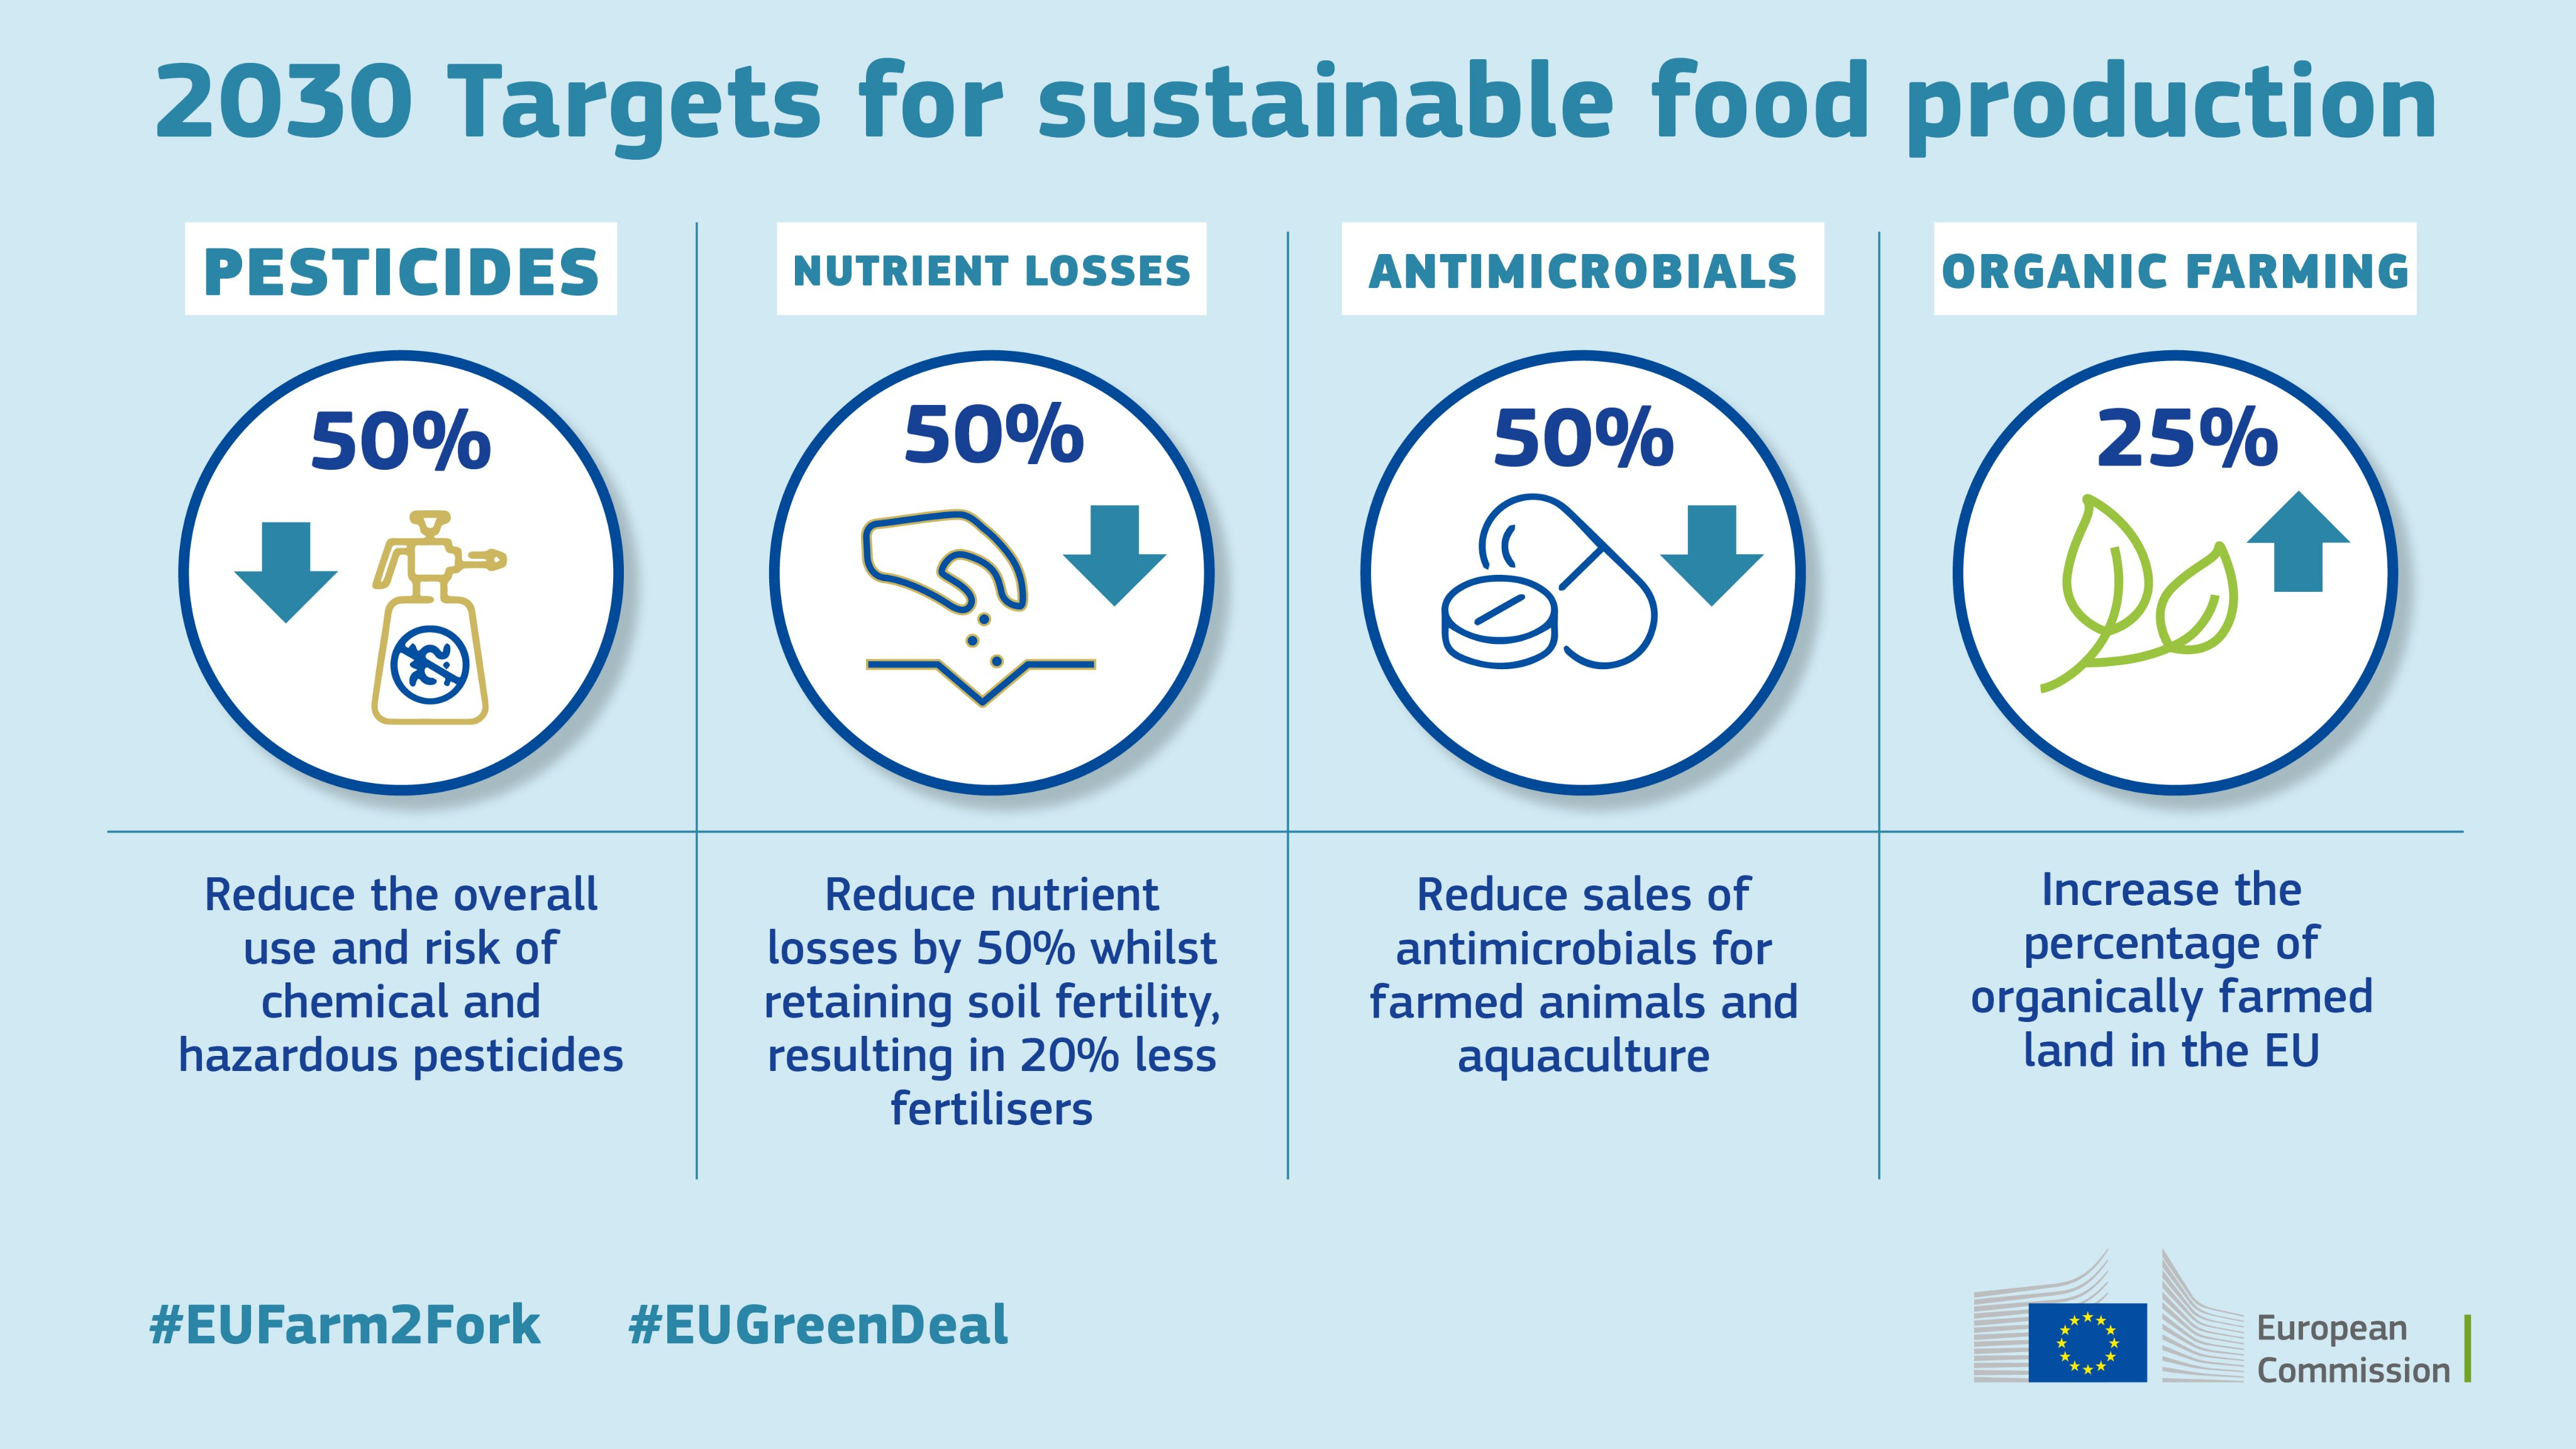

Tikslas: atlikti ekologinių plotų pokyčių ES analizę ir įvertinti, ar strategijoje "Nuo ūkio iki stalo" (ang. Farm to Fork) iškeltas tikslas pasiekti 25 proc. ekologiškai dirbamų plotų ES iki 2030 m. yra ambicingas bei kokios sritys įtakoja ekologinių plotų pokyčius. 

Hipotezės:
1. Išsikelti tiek ES, tiek Lietuvos tikslai yra per daug ambicingi (t.y. labiau nulemti emocijos nei analitikos);
2. Ekologinių plotų daugėga brangstant cheminėms trąšoms;
3. Ekologiniai plotų pokytis priklauso nuo finansinės paramos;
4. Ekologinių plotų daugėja gerėjant pragyvenimo lygiui. 

Duomenų šaltiniai: 
1. https://ec.europa.eu/eurostat/databrowser/view/tag00025/default/table?lang=en
2. https://ec.europa.eu/eurostat/databrowser/view/ORG_CROPAR/default/table?lang=en&category=agr.org 
3. https://ec.europa.eu/eurostat/databrowser/view/apri_pi10_ina/default/table?lang=en
4. https://ec.europa.eu/eurostat/databrowser/view/ILC_DI03__custom_3646076/default/table?lang=en
5. https://cohesiondata.ec.europa.eu/2014-2020/ESIF-2014-2020-FINANCES-PLANNED-DETAILS/e4v6-qrrq

# Duomenų analizė:

In [2]:
# 1. Importuojami naudojami modulių paketai
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

In [3]:
# 2. Importuojami duomenys
dirbama_zeme = pd.read_csv('dirbama_zeme.csv')
eko_plotai = pd.read_csv('eko_plotai.csv')
trasu_kaina = pd.read_csv('trasu_kaina.csv')
parama = pd.read_csv('parama2.csv')
pajamos = pd.read_csv('pajamos.csv')

In [4]:
dirbama_zeme.tail()

,unit,Country,geo,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
23,1000 ha,Romania,RO,14156.48,13981.62,13733.14,13904.64,13830.42,13858.42,13520.85,13377.93,13413.74,13825.61,13048.80,NaN
24,1000 ha,Sweden,SE,3073.70,3063.10,3031.50,3036.08,3036.07,3028.35,3020.92,3011.37,3000.39,3004.78,3005.54,3002.91
25,1000 ha,Slovenia,SI,482.65,458.20,479.65,478.89,482.21,476.86,477.67,481.42,477.93,479.82,484.06,479.49
26,1000 ha,Slovakia,SK,1921.61,1929.70,1927.45,1928.51,1924.73,1921.56,1918.88,1910.65,1919.54,1915.73,1910.04,NaN
27,1000 ha,United Kingdom,UK,17231.00,17172.00,17282.00,17259.00,17240.00,17144.00,17357.00,17472.00,17357.00,17529.00,NaN,NaN


In [5]:
eko_plotai.tail()

,unit,crops,methods,Country,geo,2012,2013,2014,2015,2016,2017,2018,2019,2020
11364,PC_UAA,W1000,UCONV,Romania,RO,0.01,0.01,0.01,0.01,0.00,0.00,0.01,0.01,0.00
11365,PC_UAA,W1000,UCONV,Sweden,SE,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,NaN
11366,PC_UAA,W1000,UCONV,Slovenia,SI,0.03,0.03,0.03,0.05,0.04,0.05,0.04,0.03,0.05
11367,PC_UAA,W1000,UCONV,Slovakia,SK,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.01
11368,PC_UAA,W1000,UCONV,United Kingdom,UK,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,NaN


In [6]:
trasu_kaina.tail()

,Valstybė,Country,p_adj,unit,product,geo\TIME_PERIOD,2000,2001,2002,2003,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
105,Slvėnija,Slovenia,RI,PCH_PRE,203000.0,SI,NaN,28.4,-9.4,-7.2,...,83.3,-26.0,-8.8,25.1,4.2,-9.4,-12.2,8.3,-10.7,-12.4
106,Slovakija,Slovakia,RI,PCH_PRE,203000.0,SK,NaN,3.7,-14.4,-6.1,...,44.0,-6.2,-18.8,14.6,0.5,-2.5,-6.4,2.9,-9.8,-10.8
107,Didžioji Britanija,United Kingdom,RI,PCH_PRE,203000.0,UK,NaN,14.2,-6.4,5.9,...,111.2,-32.5,-5.5,24.8,-6.7,-11.8,-7.2,-4.7,-18.6,5.2
108,Estija,Estonia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
109,Graikija,Greece,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [38]:
#Nėra Liuksemburgo duomenų.
parama.tail()

,Country,MS,EU_amount_eur,national_amount_eur,total_amount_eur
22,Sweden,SE,3.132219e+08,2.396076e+08,5.528295e+08
23,Romania,RO,4.206920e+08,6.337134e+07,4.840633e+08
24,Slovakia,SK,1.256759e+08,3.773997e+07,1.634158e+08
25,Slovenia,SI,6.609825e+07,2.203275e+07,8.813100e+07
26,United Kingdom,UK,8.161947e+07,1.864761e+07,1.002671e+08


In [8]:
pajamos.tail()

,unit,Country,geo,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
23,EUR,Romania,RO,2356,2324,2443,2674,2746,3059,3825,4419.0,4846.0,5446.0
24,EUR,Sweden,SE,25353,27094,27935,27218,27347,27890,27703,26356.0,26646.0,27654.0
25,EUR,Slovenia,SI,12972,12706,12843,13211,13193,13585,14127,15236.0,15836.0,16597.0
26,EUR,Slovakia,SK,7556,7266,7484,7293,7391,7491,7870,8523.0,9003.0,NaN
27,EUR,United Kingdom,UK,22395,21654,24136,25022,24602,25244,25642,NaN,NaN,NaN


In [9]:
# Iš visų eko_plotai duomenų išfiltruojama tik visos kultūros, eko ir pereinamojo laikotarpio Total ir plotas hektarais
eko_plotai_ha=eko_plotai[(eko_plotai['unit'] == 'HA') & (eko_plotai['methods']== 'TOTAL') & (eko_plotai['crops']== 'UAAXK0000')]
eko_plotai_ha.tail()

,unit,crops,methods,Country,geo,2012,2013,2014,2015,2016,2017,2018,2019,2020
4778,HA,UAAXK0000,TOTAL,Romania,RO,288261.0,286896.0,289252.0,245924.0,226309.0,258471.0,326260.0,395228.0,468887.0
4779,HA,UAAXK0000,TOTAL,Sweden,SE,477684.0,500996.0,501831.0,518983.0,552695.0,576845.0,608754.0,613964.0,610543.0
4780,HA,UAAXK0000,TOTAL,Slovenia,SI,35101.0,38664.0,41237.0,42188.0,43579.0,46222.0,47848.0,49638.0,49803.0
4781,HA,UAAXK0000,TOTAL,Slovakia,SK,164360.0,157848.0,180307.0,181882.0,187024.0,189148.0,188986.0,197565.0,222896.0
4782,HA,UAAXK0000,TOTAL,United Kingdom,UK,590011.0,558718.0,521475.0,495929.0,490205.0,497742.0,457378.0,459275.0,NaN


In [36]:
# Iš visų eko_plotai duomenų išfiltruojama tik visos kultūros, eko ir pereinamojo laikotarpio Total ir reikšmė procentais, kiek eko plotas sudaro visoje dirbamoje žemėje
eko_plotai_proc=eko_plotai[(eko_plotai['unit'] == 'PC_UAA') & (eko_plotai['methods']== 'TOTAL') & (eko_plotai['crops']== 'UAAXK0000')]
eko_plotai_proc.tail()

,unit,crops,methods,Country,geo,2012,2013,2014,2015,2016,2017,2018,2019,2020
10462,PC_UAA,UAAXK0000,TOTAL,Romania,RO,2.10,2.06,2.09,1.77,1.67,1.93,2.43,2.86,3.45
10463,PC_UAA,UAAXK0000,TOTAL,Sweden,SE,15.76,16.50,16.53,17.14,18.30,19.16,20.29,20.43,20.31
10464,PC_UAA,UAAXK0000,TOTAL,Slovenia,SI,7.32,8.07,8.55,8.85,9.12,9.60,10.01,10.35,10.29
10465,PC_UAA,UAAXK0000,TOTAL,Slovakia,SK,8.53,8.18,9.37,9.47,9.75,9.90,9.85,10.31,11.67
10466,PC_UAA,UAAXK0000,TOTAL,United Kingdom,UK,3.41,3.24,3.02,2.89,2.82,2.85,2.64,2.62,NaN


In [11]:
# Iš visų trasu_kaina duomenų išfiltruojama tik nominalios vertės (NI) ir reikšmės pagal indeksą, kur 2010 m. indeksas=100 (I10)
trasu_kaina=trasu_kaina[(trasu_kaina['p_adj'] == 'NI') & (trasu_kaina['unit']== 'I10')]
# Išfiltruojami aktualūs stulpeliai
trasu_kaina=trasu_kaina.iloc[:,[1,5,-8,-7,-6,-5,-4,-3,-2,-1]]
# Pervadinamas stulpelis
trasu_kaina=trasu_kaina.rename(columns={'geo\TIME_PERIOD':'geo'})
# Iš visų likusių stulpelių reikšmių atimama 100 tam, kad būtų gautas procentinis pokytis. 
trasu_kaina.loc[:,['2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017']]=trasu_kaina.loc[:,['2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017']].subtract(100, axis='index')
trasu_kaina.tail()

,Country,geo,2010,2011,2012,2013,2014,2015,2016,2017
24,Romania,RO,0.0,24.5,46.6,22.6,7.4,6.7,-0.6,45.0
25,Slovakia,SK,0.0,19.3,24.4,23.1,15.1,18.1,6.0,-4.1
26,Sweden,SE,0.0,21.8,18.2,6.8,13.1,17.5,0.2,2.7
27,Slovenia,SI,0.0,27.7,36.8,26.3,11.3,19.6,6.7,-5.1
28,United Kingdom,UK,0.0,30.4,25.2,13.1,6.5,1.5,-16.8,-10.1


In [12]:
# Sukuriama funkcija paskaičiuoti 2020 m. procentinį pokytį lyginant su 2019 m.
def eko_pokytis_metinis(eko_plotai_ha):
    return ((((eko_plotai_ha['2020'])-(eko_plotai_ha['2019']))/(eko_plotai_ha['2019']))*100)

# eko_plotai_ha duomenys papildomi stulpeliu "Pokytis_2019_2020" ir visam stulpeliui pritaikoma sukurta funkcija
eko_plotai_ha['Pokytis_2019_2020']=eko_plotai_ha.apply(eko_pokytis_metinis, axis='columns').round(decimals=1)

C:\Users\Agne\AppData\Local\Temp\ipykernel_16840\1519230747.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  eko_plotai_ha['Pokytis_2019_2020']=eko_plotai_ha.apply(eko_pokytis_metinis, axis='columns').round(decimals=1)


In [13]:
# Sukuriama funkcija paskaičiuoti 2020 m. procentinį pokytį lyginant su 2012 m. (metai, nuo kurių yra duomenys)
def eko_pokytis_2012_2020(eko_plotai_ha):
    return ((((eko_plotai_ha['2020'])-(eko_plotai_ha['2012']))/(eko_plotai_ha['2012']))*100)

# eko_plotai_ha duomenys papildomi stulpeliu "Pokytis_2012_2020" ir visam stulpeliui pritaikoma sukurta funkcija
eko_plotai_ha['Pokytis_2012_2020']=eko_plotai_ha.apply(eko_pokytis_2012_2020, axis='columns').round(decimals=1)

C:\Users\Agne\AppData\Local\Temp\ipykernel_16840\270845493.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  eko_plotai_ha['Pokytis_2012_2020']=eko_plotai_ha.apply(eko_pokytis_2012_2020, axis='columns').round(decimals=1)


In [14]:
# Sukuriama funkcija paskaičiuoti 2020 m. procentinį pokytį lyginant su 2013 m. (bus reikalinga analizuojant finansinę paramą)
def eko_pokytis_2013_2020(eko_plotai_ha):
    return ((((eko_plotai_ha['2020'])-(eko_plotai_ha['2013']))/(eko_plotai_ha['2013']))*100)

# eko_plotai_ha duomenys papildomi stulpeliu "Pokytis_2013_2020" ir visam stulpeliui pritaikoma sukurta funkcija
eko_plotai_ha['Pokytis_2013_2020']=eko_plotai_ha.apply(eko_pokytis_2013_2020, axis='columns').round(decimals=1)

C:\Users\Agne\AppData\Local\Temp\ipykernel_16840\73917789.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  eko_plotai_ha['Pokytis_2013_2020']=eko_plotai_ha.apply(eko_pokytis_2013_2020, axis='columns').round(decimals=1)


In [15]:
eko_plotai_ha.head()

,unit,crops,methods,Country,geo,2012,2013,2014,2015,2016,2017,2018,2019,2020,Pokytis_2019_2020,Pokytis_2012_2020,Pokytis_2013_2020
4755,HA,UAAXK0000,TOTAL,Austria,AT,533230.0,526689.0,525521.0,552141.0,571423.0,620656.0,639097.0,671703.0,679992.0,1.2,27.5,29.1
4756,HA,UAAXK0000,TOTAL,Belgium,BE,59718.0,62471.0,66704.0,68818.0,78452.0,83508.0,89025.0,93119.0,99072.0,6.4,65.9,58.6
4757,HA,UAAXK0000,TOTAL,Bulgaria,BG,39138.0,56287.0,47914.0,118552.0,160620.0,136618.0,128839.0,117779.0,116253.0,-1.3,197.0,106.5
4758,HA,UAAXK0000,TOTAL,Cyprus,CY,3923.0,4315.0,3887.0,4699.0,5550.0,5616.0,6022.0,6240.0,5918.0,-5.2,50.9,37.1
4759,HA,UAAXK0000,TOTAL,Czechia,CZ,468670.0,474231.0,472663.0,478033.0,488591.0,496277.0,519910.0,535185.0,540375.0,1.0,15.3,13.9


In [16]:
# Kuriama reprezentatyvi duomenų lentelė
eko_plotai_ha2=eko_plotai_ha.loc[4755:4781, ['Country', '2020','Pokytis_2019_2020', 'Pokytis_2012_2020']]
eko_plotai_ha2 = eko_plotai_ha2.rename(columns={'2020':'Organic area 2020 [ha]', 'Pokytis_2019_2020':'Change 2019-2020 [%]', 'Pokytis_2012_2020':'Change 2012-2020 [%]'})
eko_plotai_proc2=eko_plotai_proc.loc[10439:10465, ['Country', '2020']]
eko_plotai_proc2 = eko_plotai_proc2.rename(columns={'2020':'Organic share 2020 [%]'})
lentele=pd.merge(eko_plotai_proc2, eko_plotai_ha2, on=['Country'])
lentele

,Country,Organic share 2020 [%],Organic area 2020 [ha],Change 2019-2020 [%],Change 2012-2020 [%]
0,Austria,25.69,679992.0,1.2,27.5
1,Belgium,7.25,99072.0,6.4,65.9
2,Bulgaria,2.30,116253.0,-1.3,197.0
3,Cyprus,4.37,5918.0,-5.2,50.9
4,Czechia,15.33,540375.0,1.0,15.3
5,Germany,9.59,1590962.0,23.3,65.8
6,Denmark,11.45,299998.0,3.0,54.1
7,Estonia,22.41,220796.0,0.0,55.4
8,Greece,10.15,534629.0,1.1,15.6
9,Spain,9.98,2437891.0,3.5,38.8


Pastaba: lentelėje "Organic" apima ekologiškus ir pereinamojo laikotarpio plotus. Pereinamasis laikotarpis - 2-3 metų laikotarpis, kai laikomasi ekologišką ūkininkavimą reglamentuojančių teisės aktų, tačiau derlių realizuoti su ekologišku ženklinimu draudžiama. 

<AxesSubplot:xlabel='Change 2019-2020 [%]', ylabel='Country'>

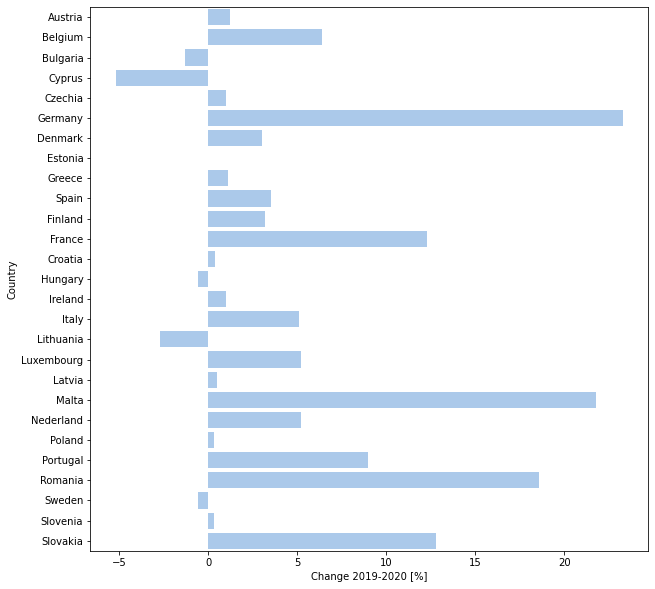

In [17]:
# Diagrama iš stulpelio "Change 2019-2020 [%]"
sns.set_color_codes("pastel")
f, ax = plt.subplots(figsize=(10, 10))
sns.barplot(x='Change 2019-2020 [%]', y='Country', data=lentele, color='b')

Lietuvoje 2020 m. lyginant su 2019 m. ekologiškų plotų sumažėjo dėl pasibaigusio 5 metus trukusio ES ir nacionalinio finansavimo laikotarpio ir užvilkintų politinių sprendimų patvirtinant naujas pereinamojo laikotarpio (laikotarpis iki naujo ES finansavimo laikotarpio) ekologinio ūkininkavimo taisykles, reikalavimus įsipareigojimams, išmokų dydžius ir pan. 

<AxesSubplot:xlabel='Change 2012-2020 [%]', ylabel='Country'>

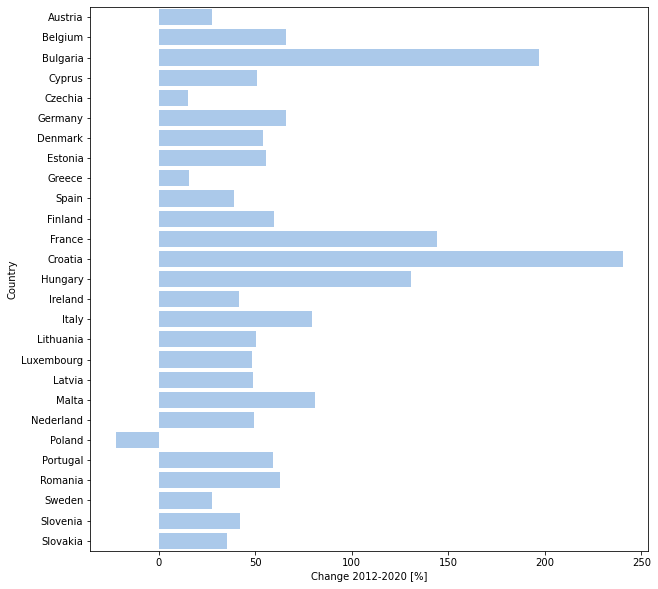

In [18]:
# Diagrama iš stulpelio "Change 2012-2020 [%]"
sns.set_color_codes("pastel")
f, ax = plt.subplots(figsize=(10, 10))
sns.barplot(x='Change 2012-2020 [%]', y='Country', data=lentele, color='b')

2012-2020 m. laikotarpiu: 
- ekologinių plotų Lenkijoje ženkliai sumažėjo dėl iki 2014 m. lengvai įgyvendinamų kriterijų gauti paramą ekologiniam ūkininkavimui. Prasidėjus 2014 - 2020 m. paramos laikotarpiui reikalavimai labai sugriežtinti.
- Kroatijos teigiamą šuolį nulėmė įstojimas į ES 2013 m. ir 2011-2016 m. nacionalininis veiksmų planas, kuriuo siekta iki 2016 m. ekologinei gamybai panaudoti 8 % visos žemės ūkio paskirties žemės. Tačiau tikslai nebuvo pasiekti: 2016 m. rezultatas - 6,05 proc. Net 2020 m. nebuvo pasiektas įgyvendinti iki 2016 m. užsibrėžtas tikslas. 2020 m. rezultatas - 7,21 proc. 
- Bulgarijos teigiamas pokytis išsiskiria, nes 2012 m. ekologiški plotai sudarė vos 0,76 proc. 2020 m. rezultatas - 2,3 proc. 

In [19]:
# ES (bendrai visų priklausančių šalių) ekologinių plotų skaičiavimas 2012-2020 m. 
# Dirbama_zeme duomenų mato vnt. yra 1000 ha, todėl atliekamas perskaičiavimas padauginant visas duomenų stulpelių reikšmes iš 1000
dirbama_zeme.loc[:,['2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021']]=dirbama_zeme.loc[:,['2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021']].multiply(1000, axis='index')
# Susumuojami visų šalių dirbamos žemės plotai pagal metus
dirbama_zeme_suma_pagal_metus=pd.DataFrame(dirbama_zeme[['2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021']]).sum()
# Susumuojami visų šalių ekologiški plotai pagal metus
eko_plotai_suma_pagal_metus= pd.DataFrame(eko_plotai_ha[[ '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020']]).sum()

# Sukuriama funkcija ekologiškos ir visos dirbamos žemės ploto santykiui suskaičiuoti 
def es_santykis():
    return eko_plotai_suma_pagal_metus[['2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020']]/dirbama_zeme_suma_pagal_metus[['2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020']]

In [20]:
# Duomenų pavertimas DataFrame objektu
dic=({'2012':'5.6','2013':'5.7', '2014':'5.8', '2015':'6.2', '2016':'6.7', '2017':'7.0', '2018':'7.5', '2019':'7.9', '2020':'9.1'})
eko_plotai_santykis_ES=pd.DataFrame(list(dic.items()),columns=['Year', 'Organic share EU [%]'])
eko_plotai_santykis_ES

,Year,Organic share EU [%]
0,2012,5.6
1,2013,5.7
2,2014,5.8
3,2015,6.2
4,2016,6.7
5,2017,7.0
6,2018,7.5
7,2019,7.9
8,2020,9.1


Text(0, 0.5, 'Organic share [%]')

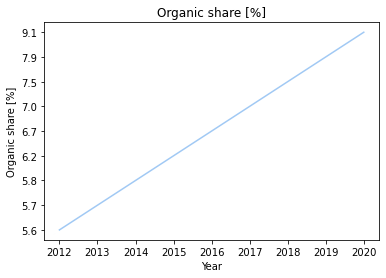

In [21]:
plt.title('Organic share [%]')
plt.plot(eko_plotai_santykis_ES['Year'], eko_plotai_santykis_ES['Organic share EU [%]'], 'b')
plt.xlabel("Year")
plt.ylabel("Organic share [%]")

In [22]:
# 2020 m. duomenų papildymas ES (visų šalių bendrai) informacija
lentele_su_EU = lentele.append({'Country' : 'EU', 'Organic share 2020 [%]' : 9.1, 'Organic area 2020 [ha]' : 14725050.0}, ignore_index=True)

C:\Users\Agne\AppData\Local\Temp\ipykernel_16840\3457584910.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  lentele_su_EU = lentele.append({'Country' : 'EU', 'Organic share 2020 [%]' : 9.1, 'Organic area 2020 [ha]' : 14725050.0}, ignore_index=True)


<AxesSubplot:xlabel='Organic share 2020 [%]', ylabel='Country'>

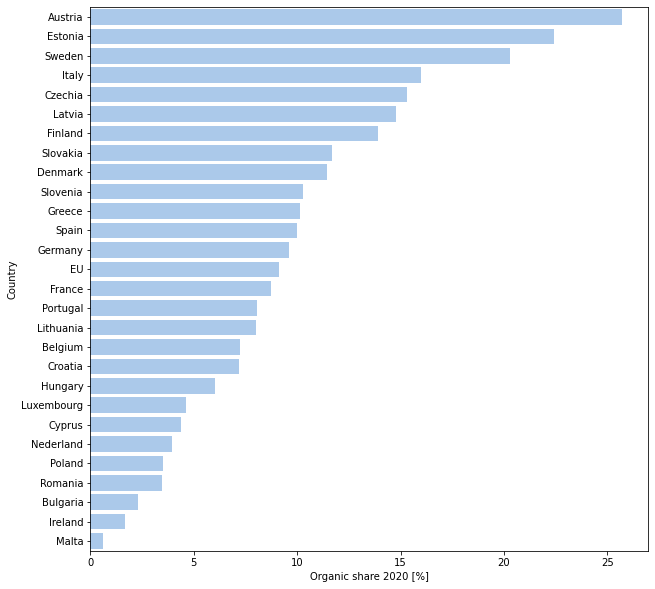

In [23]:
sns.set_color_codes("pastel")
f, ax = plt.subplots(figsize=(10, 10))
sns.barplot(x='Organic share 2020 [%]', y='Country', data=lentele_su_EU, color='b', order=lentele_su_EU.sort_values('Organic share 2020 [%]', ascending=False).Country)

In [24]:
# Tikrinama ekologiškų plotų priklausomybė nuo cheminių trąšų ir dirvos gerinimo medžiagų kainos.
# Pasirenkamos 6 šalys, kurių eko plotai nuo 2012 paaugo daugiausiai ir eliminuojamos tokias, kur 2020 m. eko ploto santykis nesiekė 5 proc., nes atskaitos taško metais (2012) buvo labai mažai ekologiškų plotų (juos buvo lengviau pvz. padvigubinti per 8 m.) 
top_augimas=lentele[(lentele['Change 2012-2020 [%]'] > 60) & (lentele['Organic share 2020 [%]'] > 5)]
top_augimas                                           

,Country,Organic share 2020 [%],Organic area 2020 [ha],Change 2019-2020 [%],Change 2012-2020 [%]
1,Belgium,7.25,99072.0,6.4,65.9
5,Germany,9.59,1590962.0,23.3,65.8
11,France,8.71,2517478.0,12.3,144.2
12,Croatia,7.21,108610.0,0.4,240.4
13,Hungary,6.03,301430.0,-0.6,130.8
15,Italy,15.97,2095364.0,5.1,79.5


In [25]:
# Sukuriama šių šalių ekologinių plotų procentinės išraiškos kasmet lentelė
eko_plotai_proc_top=eko_plotai_proc.iloc[[1,5, 11, 12, 13, 15],[5,6,7,8,9,10]]
eko_plotai_proc_top = eko_plotai_proc_top.T
eko_plotai_proc_top = eko_plotai_proc_top.reset_index()
eko_plotai_proc_top.columns=['Year', 'Belgium', 'Germany', 'France', 'Croatia', 'Hungary', 'Italy']
eko_plotai_proc_top

,Year,Belgium,Germany,France,Croatia,Hungary,Italy
0,2012,4.48,5.76,3.55,2.40,2.45,9.30
1,2013,4.67,6.04,3.66,3.13,2.45,10.60
2,2014,5.00,6.18,3.87,4.03,2.34,10.91
3,2015,5.17,6.34,4.54,4.94,2.43,11.79
4,2016,5.80,6.82,5.29,6.05,3.48,13.99
5,2017,6.28,6.82,5.99,6.46,3.73,14.67


In [26]:
# Sukuriama šių šalių trąšų kainos pokyčių kasmet lentelė
trasu_kaina_p = trasu_kaina.T
trasu_kaina_p= trasu_kaina_p.reset_index()
trasu_kaina_p = trasu_kaina_p.iloc[4:10, [0, 2, 7, 12, 6, 13, 15]]
trasu_kaina_p.columns=['Year', 'Belgium', 'Germany', 'France', 'Croatia', 'Hungary', 'Italy']
trasu_kaina_p

,Year,Belgium,Germany,France,Croatia,Hungary,Italy
4,2012,21.4,25.3,29.0,28.0,38.8,23.8
5,2013,12.0,21.4,22.6,22.9,33.1,19.3
6,2014,10.9,11.2,16.9,4.1,27.9,14.9
7,2015,15.4,13.9,19.1,NaN,31.2,18.3
8,2016,0.6,6.3,5.0,NaN,16.4,10.6
9,2017,-1.7,4.5,1.8,NaN,8.8,7.4


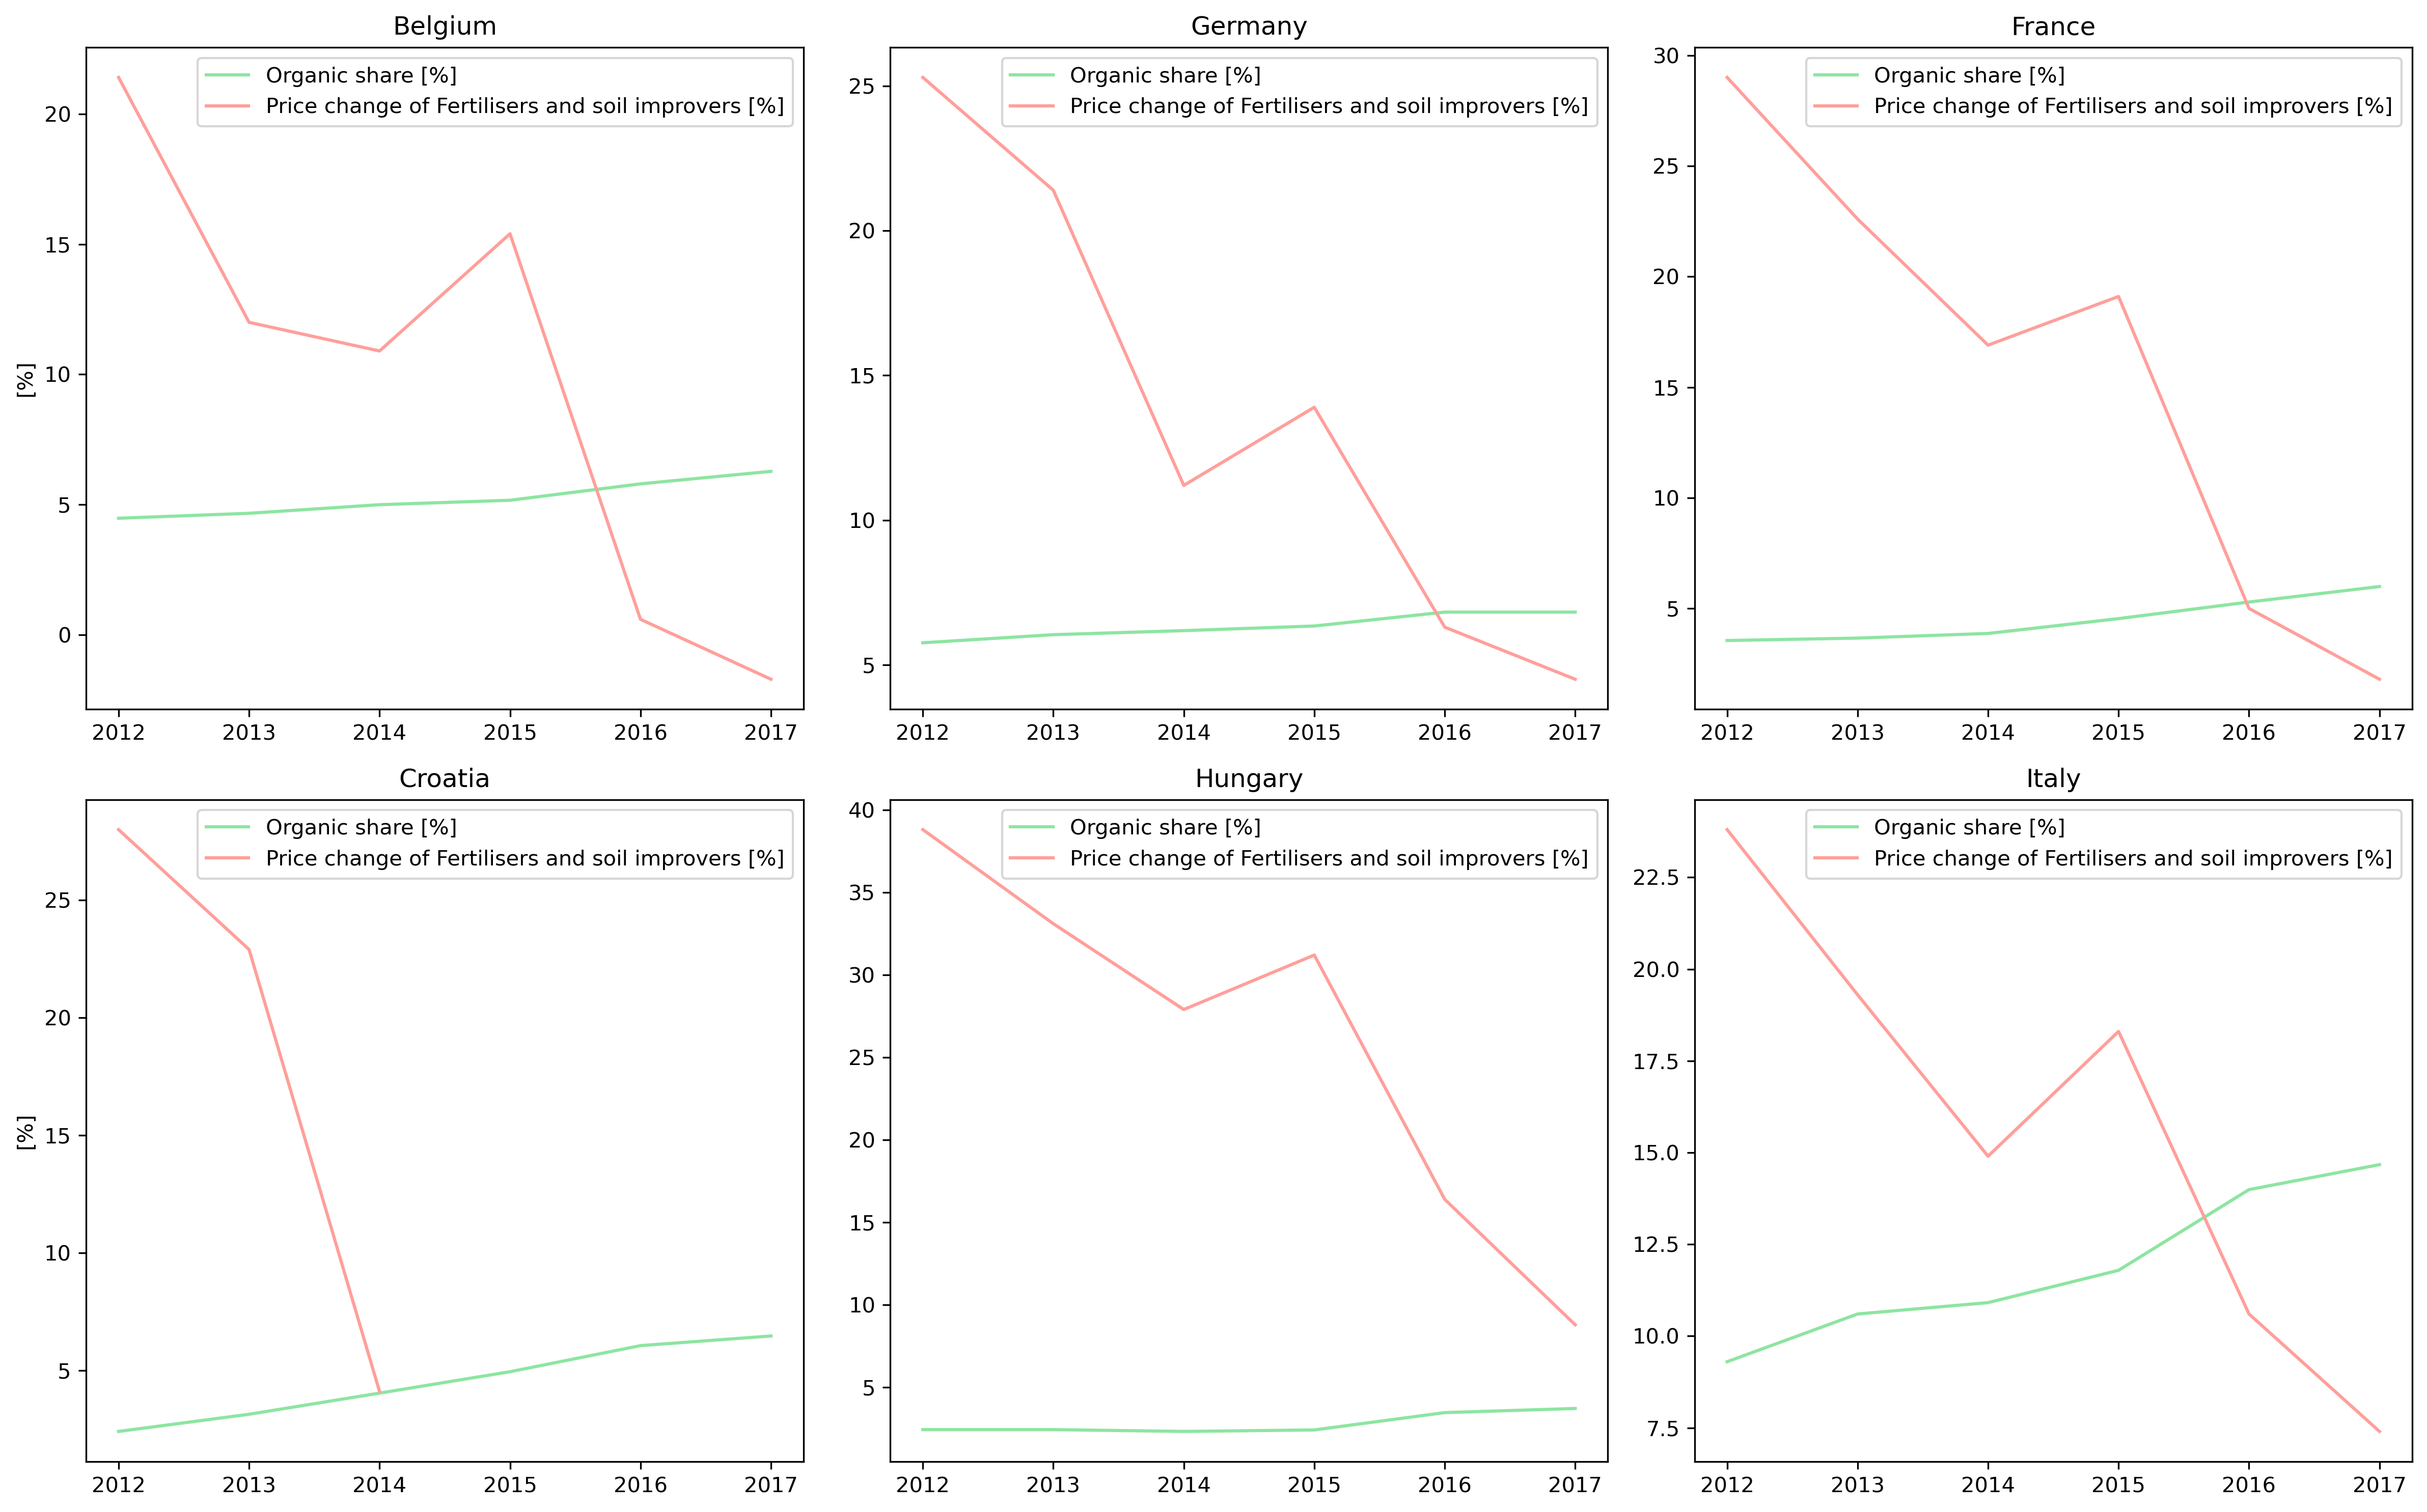

In [27]:
# Brėžiami top 6 šalių grafikai, kur atvaizduojama ekologinių plotų santykis ir trašų bei dirvos gerinimo medžiagų kainos pokytis
fig = plt.figure(figsize=(16,10), dpi=300)

plt.subplot(2, 3, 1) 
plt.title('Belgium')
plt.plot(eko_plotai_proc_top['Year'],eko_plotai_proc_top['Belgium'], 'g')
plt.plot(trasu_kaina_p['Year'],trasu_kaina_p['Belgium'], 'r')
plt.ylabel('[%]')
plt.legend(['Organic share [%]', 'Price change of Fertilisers and soil improvers [%]'])

plt.subplot(2, 3, 2) 
plt.title('Germany')
plt.plot(eko_plotai_proc_top['Year'], eko_plotai_proc_top['Germany'], 'g')
plt.plot(trasu_kaina_p['Year'],trasu_kaina_p['Germany'], 'r')
plt.legend(['Organic share [%]', 'Price change of Fertilisers and soil improvers [%]'])

plt.subplot(2, 3, 3) 
plt.title('France')
plt.plot(eko_plotai_proc_top['Year'],eko_plotai_proc_top['France'], 'g')
plt.plot(trasu_kaina_p['Year'],trasu_kaina_p['France'], 'r')
plt.legend(['Organic share [%]', 'Price change of Fertilisers and soil improvers [%]'])

plt.subplot(2, 3, 4) 
plt.title('Croatia')
plt.plot(eko_plotai_proc_top['Year'],eko_plotai_proc_top['Croatia'], 'g')
plt.plot(trasu_kaina_p['Year'],trasu_kaina_p['Croatia'], 'r')
plt.ylabel('[%]')
plt.legend(['Organic share [%]', 'Price change of Fertilisers and soil improvers [%]'])

plt.subplot(2, 3, 5) 
plt.title('Hungary')
plt.plot(eko_plotai_proc_top['Year'],eko_plotai_proc_top['Hungary'], 'g')
plt.plot(trasu_kaina_p['Year'],trasu_kaina_p['Hungary'], 'r')
plt.legend(['Organic share [%]', 'Price change of Fertilisers and soil improvers [%]'])

plt.subplot(2, 3, 6) 
plt.title('Italy')
plt.plot(eko_plotai_proc_top['Year'],eko_plotai_proc_top['Italy'], 'g')
plt.plot(trasu_kaina_p['Year'],trasu_kaina_p['Italy'], 'r')
plt.legend(['Organic share [%]', 'Price change of Fertilisers and soil improvers [%]'])

plt.tight_layout()

Visų TOP 6 šalių grafikai leidžia daryti išvadą, kad nėra tiesioginio ryšio tarp ekologinių plotų didėjimo ir cheminių trąšų bei dirvos gerinimo medžiagų kainos. 
Pastaba: grafikuose trąšų kainos reikšmingai mažėja, nes jų pokytis pateiktas pagal 2010 metų lygį. Po 2008 m. keletą metų trąšos ir dirvos gerinimo medžiagos stipriai brango. 

In [28]:
# Tikrinama ekologiškų plotų priklausomybė nuo finansinės paramos.
# Suskaičiuojama ekologiškų plotų, už kuriuos galėjo būti mokama parama iš ES 2014-2020 m. Kaimo plėtros programos, suma
eko_plotai_ha_2014_2020=eko_plotai_ha.iloc[:,[3,7, 8, 9, 10, 11, 12,13]]
eko_plotai_ha_2014_2020=eko_plotai_ha_2014_2020.T
eko_plotai_ha_2014_2020.columns=['Austria', 'Belgium', 'Bulgaria', 'Cyprus', 'Czechia', 'Germany', 'Denmark', 'Estonia', 'Greece', 'Spain', 'Finland', 'France', 'Croatia', 'Hungary', 'Ireland', 'Italy', 'Lithuania', 'Luxembourg', 'Latvia', 'Malta', 'Nederland', 'Poland', 'Portugal', 'Romania', 'Sweden', 'Slovenia', 'Slovakia', 'United Kingdom']
eko_plotai_ha_2014_2020=eko_plotai_ha_2014_2020.iloc[1:8,0:27]
eko_plotai_ha_suma_2014_2020=pd.DataFrame(eko_plotai_ha_2014_2020[['Austria', 'Belgium', 'Bulgaria', 'Cyprus', 'Czechia', 'Germany', 'Denmark', 'Estonia', 'Greece', 'Spain', 'Finland', 'France', 'Croatia', 'Hungary', 'Ireland', 'Italy', 'Lithuania', 'Luxembourg', 'Latvia', 'Malta', 'Nederland', 'Poland', 'Portugal', 'Romania', 'Sweden', 'Slovenia', 'Slovakia']]).sum()
eko_plotai_ha_suma_2014_2020=pd.DataFrame(eko_plotai_ha_suma_2014_2020)
eko_plotai_ha_suma_2014_2020= eko_plotai_ha_suma_2014_2020.reset_index()
eko_plotai_ha_suma_2014_2020.columns=['Country', 'sum_of_area_2014_2020']
eko_plotai_ha_suma_2014_2020.head()

,Country,sum_of_area_2014_2020
0,Austria,4260533.0
1,Belgium,578698.0
2,Bulgaria,826575.0
3,Cyprus,37932.0
4,Czechia,3531034.0


In [29]:
# Paskaičiuojamas išmokos dydis Eur už ha 
ha_suma_parama = pd.merge(parama, eko_plotai_ha_suma_2014_2020, on=['Country'])
ha_suma_parama['eur_ha_2014_2020']=ha_suma_parama['total_amount_eur'].divide(ha_suma_parama['sum_of_area_2014_2020'], axis = 'index')
# Sumos perskaičiuojamos į milijonus, kad nebūtų rodomos laipsniu
ha_suma_parama['EU_amount_eur'] = ha_suma_parama['EU_amount_eur'].divide(1000000, axis = 'index')
ha_suma_parama['national_amount_eur']=ha_suma_parama['national_amount_eur'].divide(1000000, axis = 'index')
ha_suma_parama['total_amount_eur']=ha_suma_parama['total_amount_eur'].divide(1000000, axis = 'index')
ha_suma_parama=ha_suma_parama.rename(columns={'EU_amount_eur':'EU_amount_mln_eur','national_amount_eur':'national_amount_mln_eur', 'total_amount_eur':'total_amount_mln_eur'})
ha_suma_parama_mln_eur = ha_suma_parama
ha_suma_parama_mln_eur.head()

,Country,MS,EU_amount_mln_eur,national_amount_mln_eur,total_amount_mln_eur,sum_of_area_2014_2020,eur_ha_2014_2020
0,Estonia,EE,114.882500,36.682500,151.565000,1336782.0,113.380491
1,Austria,AT,545.691502,502.308499,1048.000001,4260533.0,245.978614
2,Malta,MT,0.000762,0.000254,0.001016,298.0,3.409396
3,Belgium,BE,73.097138,102.877886,175.975024,578698.0,304.087839
4,France,FR,1376.008662,433.683888,1809.732510,12515917.0,144.59448


[Text(0, 0.5, 'Country'), Text(0.5, 0, 'Total and EU Amount [million euro]')]

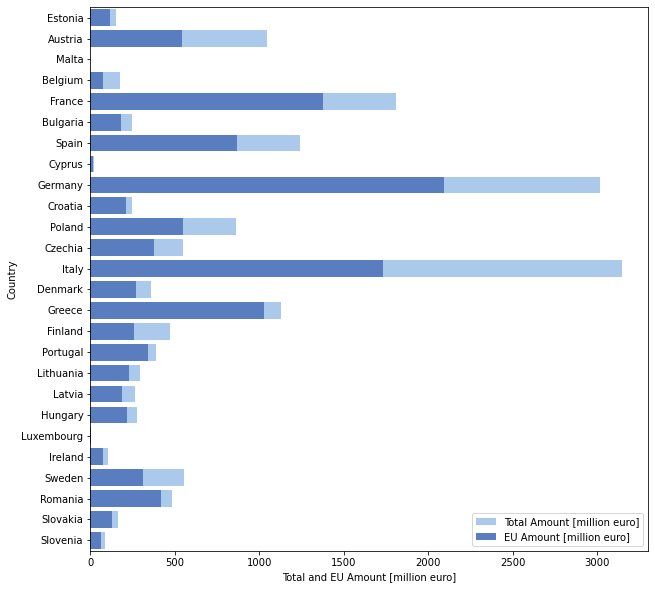

In [30]:
# Nubraižomas bendros paramos pagal šalis grafikas atvaizduojant bendrą paramą ir ant jos ES paramą (likusi dalis nacionalinė parama)
f, ax = plt.subplots(figsize=(10, 10))
sns.set_color_codes("pastel")
sns.barplot(x="total_amount_mln_eur", y="Country", data=ha_suma_parama_mln_eur, label="Total Amount [million euro]", color="b")
sns.set_color_codes("muted")
sns.barplot(x="EU_amount_mln_eur", y='Country', data=ha_suma_parama_mln_eur, label="EU Amount [million euro]", color="b")

ax.legend(loc="lower right", frameon=True)
ax.set(ylabel="Country", xlabel="Total and EU Amount [million euro]")

[Text(0, 0.5, 'Country'), Text(0.5, 0, 'Eur/ha 2014-2020')]

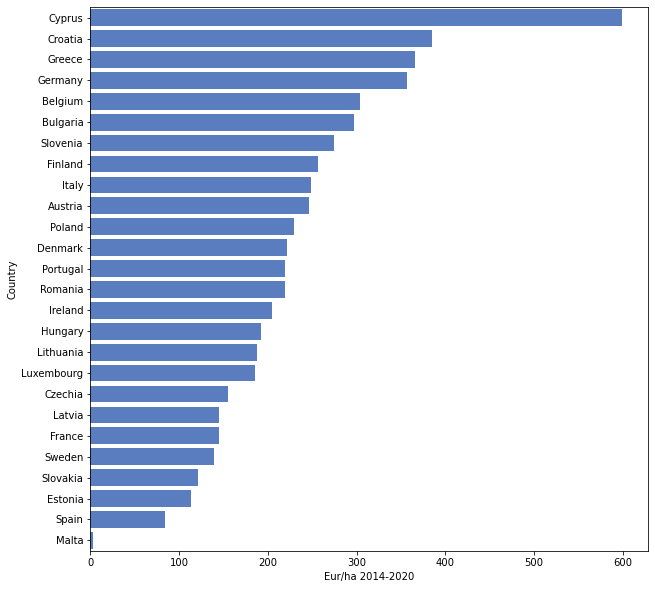

In [31]:
f, ax = plt.subplots(figsize=(10, 10))
sns.barplot(x='eur_ha_2014_2020', y='Country', data=ha_suma_parama,  color='b', order=ha_suma_parama.sort_values('eur_ha_2014_2020', ascending=False).Country)
ax.set(ylabel="Country", xlabel="Eur/ha 2014-2020")

Text(0, 0.5, 'Organic share change 2013-2020 [%]')

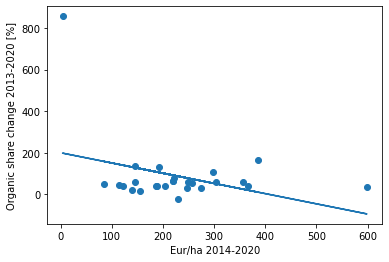

In [32]:
# Naudojami grafikui duomenys sujungiami į bendrą lentelę. 
lentele2 = pd.merge(ha_suma_parama, eko_plotai_ha, on=['Country'])

# Brėžiamas priklausomybės tarp vidutinio išmokos dydžio ir ekologinių plotų pokyčio grafikas bei tiesinė regresija
from sklearn.linear_model import LinearRegression
x = lentele2[['eur_ha_2014_2020']]
y = lentele2['Pokytis_2013_2020']
model = LinearRegression()
model.fit(x,y)
lentele2['prediction'] = model.predict(x)
plt.scatter(lentele2['eur_ha_2014_2020'],lentele2['Pokytis_2013_2020'])
plt.plot(lentele2['eur_ha_2014_2020'], lentele2['prediction'])

plt.xlabel("Eur/ha 2014-2020")
plt.ylabel("Organic share change 2013-2020 [%]")

Kaip matyti iš grafiko ekologinių plotų augimo neįtakoja išmokos dydis. 
Tiesinę regresiją iškreipia dvi ES narės - salos: 
- Maltoje 2013 m. buvo 7 ha ekologiškų plotų. 2020 m. - 67 ha, todėl procentinis augimas didelis (virš 800 proc.), tačiau bendram ES kontekste visiškai nereikšmingas. Vidutinė išmoka vos keli Eur/ha. 
- Kipre vidutinė išmoka siekia beveik 600 Eur/ha, tačiau jos išskirtinis ES šalių kontekste vidutinis išmokų dydis neįtakoja didesnio ekologiškų plotų augimo nei kitose šalyse. 

In [33]:
# Paskaičiuojamas pajamų ES vidurkis
pajamu_vidurkis_ES = pd.DataFrame(pajamos[[ '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020']]).mean().round(decimals=2)
pajamu_vidurkis_ES = pd.DataFrame(list(pajamu_vidurkis_ES.items()), columns=['Year', 'income_avr'])
# Sukuriama lentelė su duomenimis, reikalingais išanalizuoti ryšį tarp pajamų ir ekologinių plotų. 
lentele3 = pd.merge(eko_plotai_santykis_ES, pajamu_vidurkis_ES, on=['Year'])
lentele3
                                                                    

,Year,Organic share EU [%],income_avr
0,2012,5.6,15572.32
1,2013,5.7,15739.21
2,2014,5.8,16055.50
3,2015,6.2,16315.93
4,2016,6.7,16554.93
5,2017,7.0,17174.00
6,2018,7.5,17684.79
7,2019,7.9,18131.89
8,2020,9.1,18981.63


Text(0, 0.5, 'Income [Eur]')

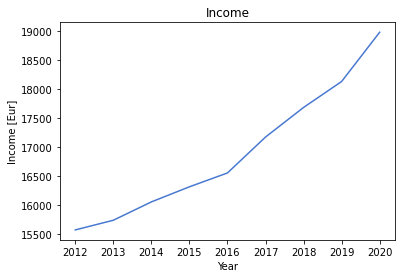

In [34]:
# Nubrėžiama pajamų kreivė. Organinių plotų kreivė nubrėžta anksčiau. 
plt.title('Income')
plt.plot(lentele3['Year'], lentele3['income_avr'], 'b')
plt.xlabel("Year")
plt.ylabel("Income [Eur]")

Text(0, 0.5, 'Organic share EU [%]')

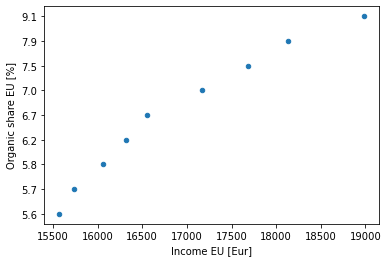

In [35]:
lentele3.plot.scatter(x = 'income_avr', y='Organic share EU [%]')
plt.xlabel("Income EU [Eur]")
plt.ylabel("Organic share EU [%]")

Iš grafiko matyti ryšys, kad didėjant vidutinėms ES gyventojo metinėms pajamoms neto didėja ir ekologiškų plotų santykis su visais žemės ūkio paskirties plotais. 

# Išvados
- Per laikotarpį nuo 2012 iki 2020 m. (trukmė - 8 metai) ekologiškų plotų santykis padidėjo nuo 5,6 iki 9,1 proc. Iš viso - 3,5 procento. Siekiant minėto 25 proc. iki 2030 m. tikslo per 10 m. (skaičiuojant nuo 2020 m.) šis rodiklis turėtų padidėti dar 15,9 proc., t.y. augimas turėtų būti virš 4 kartų spartesnis nei per nagrinėjamą laikotarpį. 
- Lietuvoje ekologiškų plotų padidėjo nuo 5,51 proc. 2012 m. iki 8 proc. 2020 m. Iš viso 2,49 procentais. Siekiant padvigubinti 2020 m. rodiklį, t.y. pasiekti 16 proc. iki 2030 m., augimą teks paspartinti 3 kartus. 

Taip pat šia analize gauti rezultatai: 
- Cheminių trąšų bei kitų dirvos gerinimo medžiagų kainos neturi įtakos ekologiškai dirbamų plotų pokyčiams;
- Nesudėtingai įsisavinama finansinė paskata ekologiniams ūkiams yra svarbi, tačiau išmokų dydis neturi reikšmingos įtakos ekologiškai dirbamų plotų pokyčiams;
- Didėjant vidutinėms ES gyventojo metinėms pajamoms neto didėja ir ekologiškų plotų santykis su visais žemės ūkio paskirties plotais. 

Tikslai labai ambicingi ir reikalaujantys reikšmingų politinių ir verslo sprendimų bei visuomenės požiūrio pokyčių.

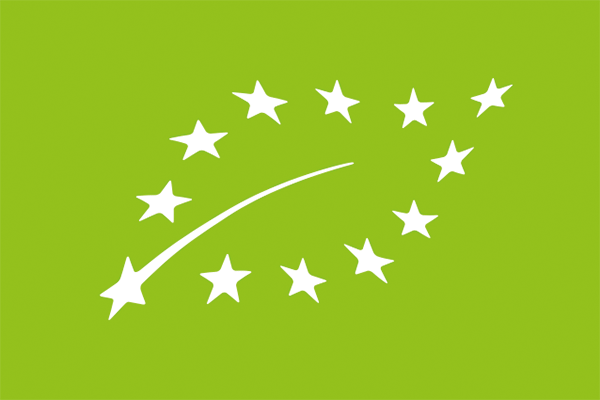